# Analysis of selected funds

In [2]:
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse

In [16]:
path = '../data/interim/holdings_summary_total.feather'
info_df = feather.read_dataframe(path)

In [17]:
info_df.sample(5)

,port_no,report_dt,index_fund_flag,et_flag,crsp_obj_cd,mutual_fund,sample
107200,1005016,2007-06-30,MF,MF,None,Y,N
534031,1028193,2011-08-31,MF,MF,EDYG,Y,Y
619505,1030021,2016-07-31,MF,MF,EDYG,Y,Y
322863,1024103,2017-08-31,MF,MF,EDCS,Y,N
227624,1022306,2015-02-28,MF,MF,I,Y,N


## Distribution by date

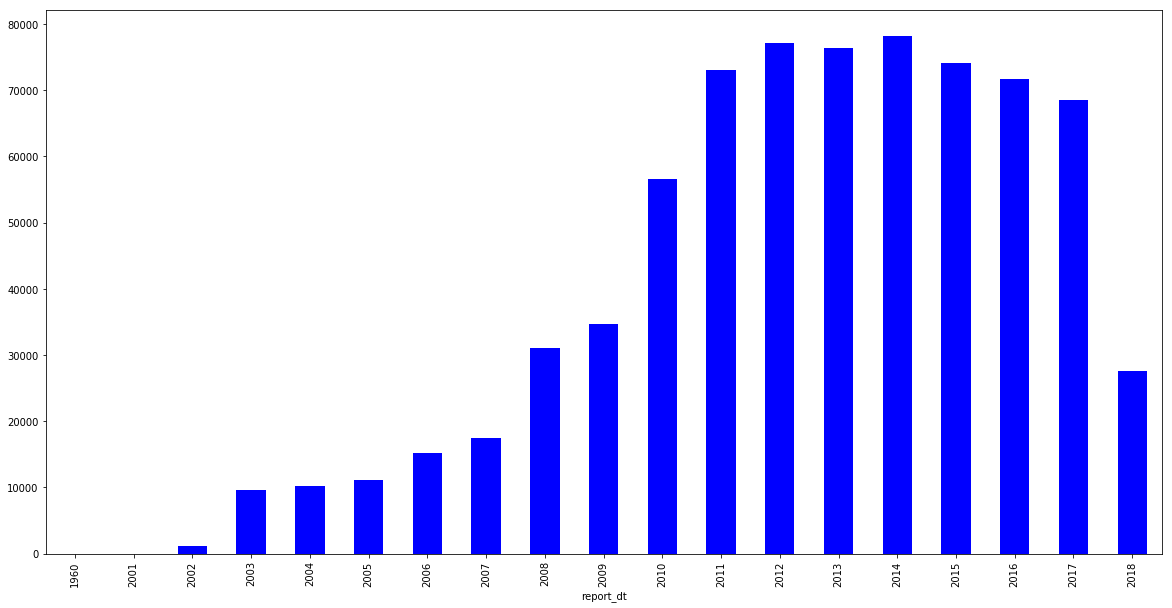

In [18]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["port_no"]
    .groupby([
         info_df["report_dt"].dt.year,
#         info_df["report_dt"].dt.month
     ])
     .count()
     .plot(kind="bar",
           color = 'b',
          figsize=(20,10)))

## Distribution by number of observations per fund 

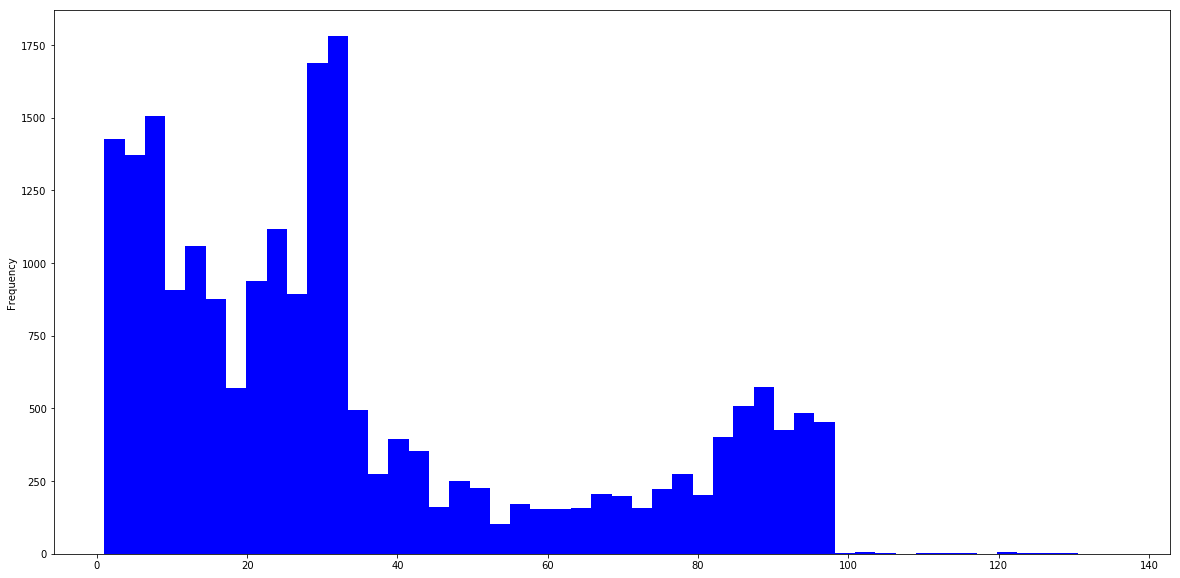

In [19]:
(info_df["port_no"]
     .groupby([
         info_df["port_no"],
     ])
     .count()
     .plot(kind="hist",
           bins = 50,
           color = 'b',
           figsize=(20,10)))

## Distribution by crsp_obj_cd

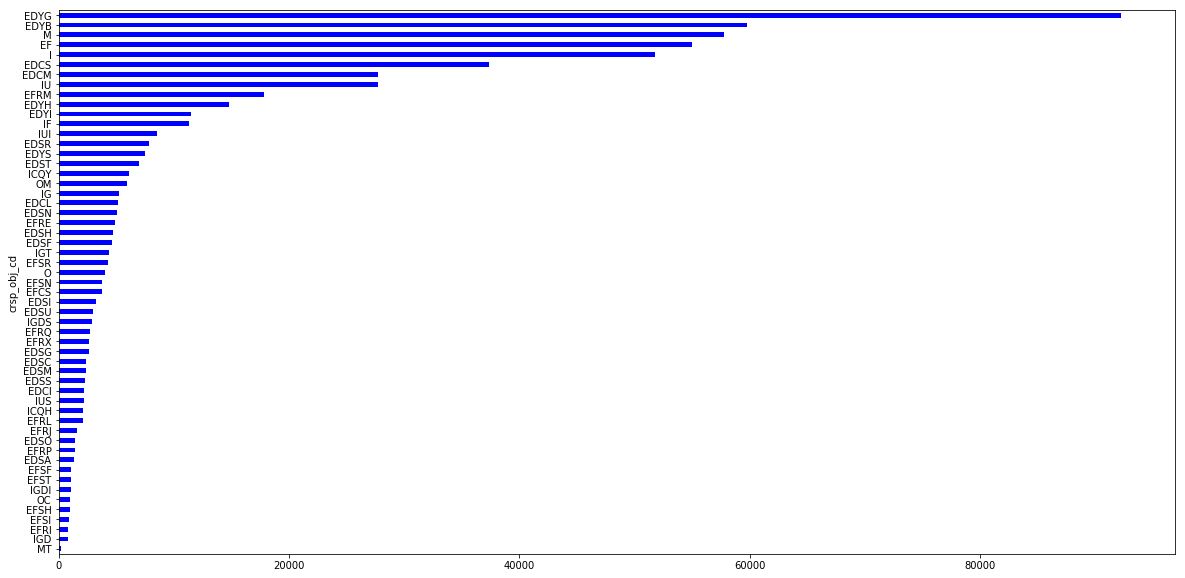

In [20]:
(info_df["port_no"]
     .groupby([
         info_df["crsp_obj_cd"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

## Distribution by flags

B = Index-based fund
D = Index fund
E = Index fund enhanced

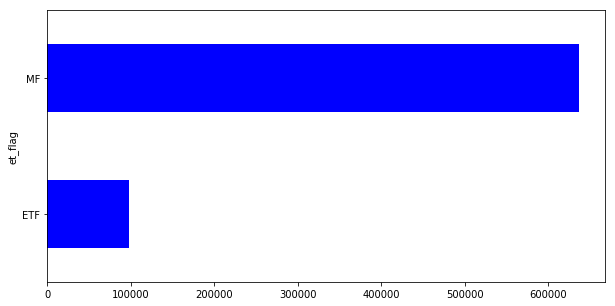

In [21]:
(info_df["et_flag"]
     .groupby([
         info_df["et_flag"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(10,5)))

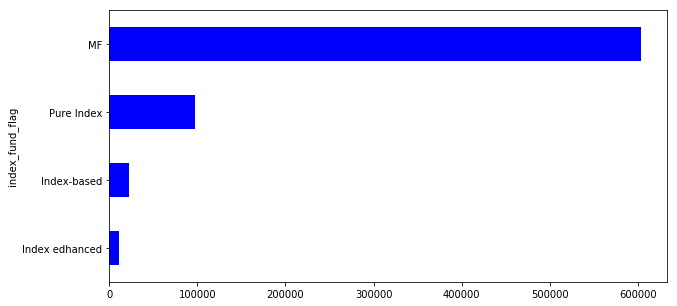

In [22]:
(info_df["index_fund_flag"]
     .groupby([
         info_df["index_fund_flag"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(10,5)))

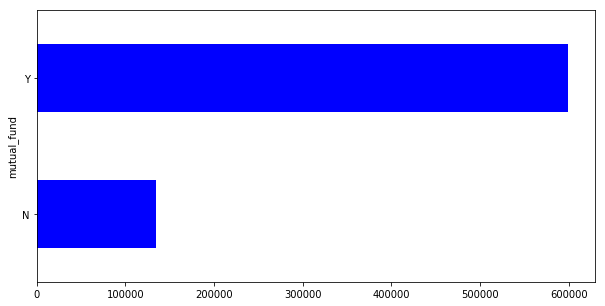

In [23]:
(info_df["mutual_fund"]
     .groupby([
         info_df["mutual_fund"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(10,5)))

## Distribution by crsp_obj_cd for mutual funds

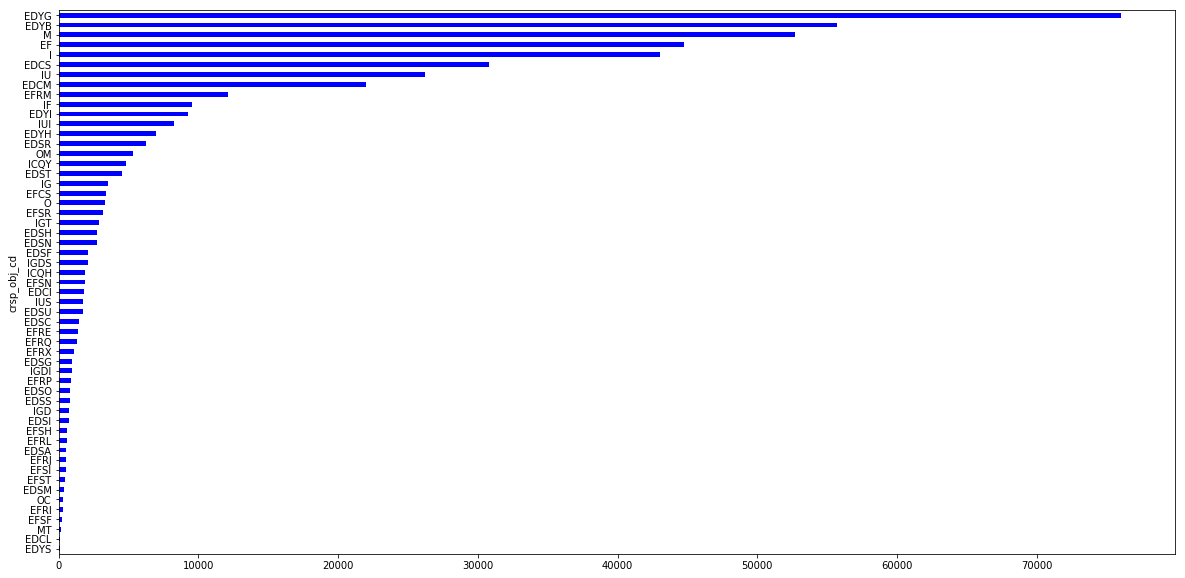

In [24]:
(info_df.loc[info_df['mutual_fund'] == 'Y',"port_no"]
     .groupby([
         info_df["crsp_obj_cd"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

In [25]:
plt.rc('font', size=20)          # controls default text sizes

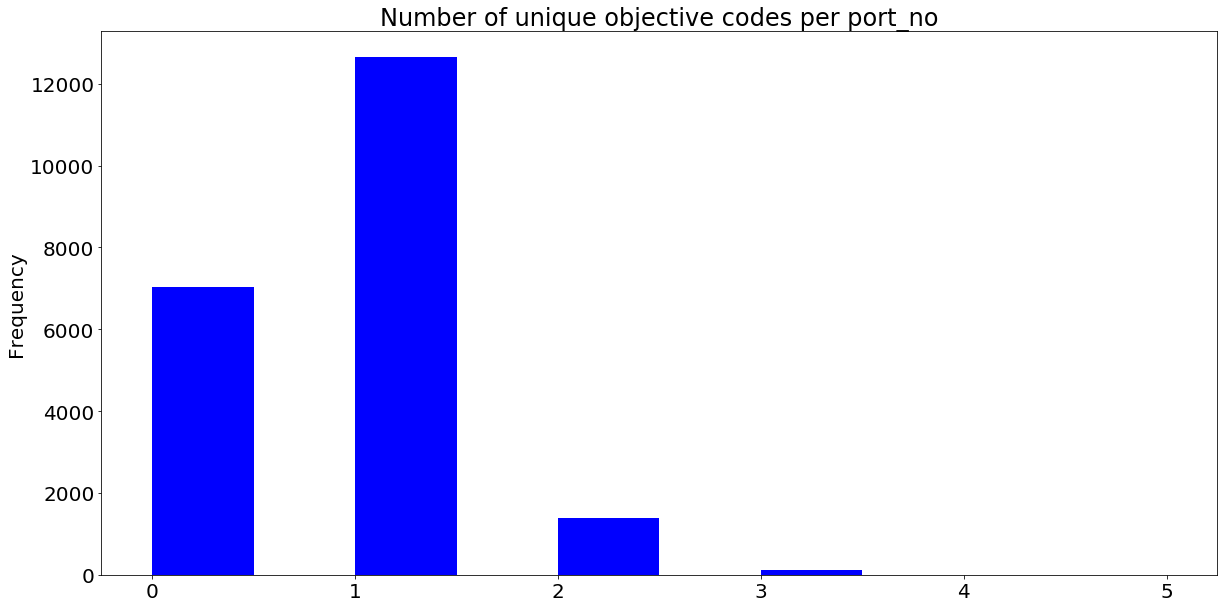

In [26]:
obj_per_portno = info_df[['port_no','crsp_obj_cd']]
ax = (obj_per_portno["crsp_obj_cd"]
    .groupby([
        obj_per_portno["port_no"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="hist",
          color = 'b',
          bins = 10,
          figsize=(20,10),
          title='Number of unique objective codes per port_no')
)